In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append('../src')
import pandas as pd
import numpy as np
import gravity as pygrav
import matplotlib.pyplot as plt

from plot import plot_gravity_anomaly
from tide_system import TideSystemConverter

In [28]:
df1 = pd.read_csv('MeanTideGravity.csv')
df1.head()

,lon,lat,height,gravity
0,-0.166667,5.600000,66.45,978100.60
1,-0.183333,5.600000,96.32,978091.07
2,-0.333333,5.800000,50.29,978086.51
3,-0.083333,5.883333,73.15,978092.46
4,-0.033333,6.066667,83.82,978086.30


In [4]:
df = TideSystemConverter(path_to_data='MeanTideGravity.csv').gravity_mean2free()
df.head()

Path to data provided. Reading data from file.


,lon,lat,h,gravity,gravity_free,h_free
0,-0.166667,5.600000,66.45,978100.60,978100.645183,66.517320
1,-0.183333,5.600000,96.32,978091.07,978091.115183,96.387320
2,-0.333333,5.800000,50.29,978086.51,978086.555087,50.357177
3,-0.083333,5.883333,73.15,978092.46,978092.505046,73.217116
4,-0.033333,6.066667,83.82,978086.30,978086.344953,83.886978


In [5]:
free_air_anomaly, bouguer_anomaly = pygrav.gravity_anomalies(lat=df['lat'], gravity=df['gravity_free'], elevation=df['h_free'], ellipsoid='grs80')

In [7]:
df_anomalies = pd.DataFrame({'lon': df['lon'], 'lat': df['lat'], 'free_air': free_air_anomaly, 'bouguer': bouguer_anomaly})
df_anomalies.head()

,lon,lat,free_air,bouguer
0,-0.166667,5.600000,40.195665,32.752377
1,-0.183333,5.600000,39.880607,29.094866
2,-0.333333,5.800000,17.557553,11.922585
3,-0.083333,5.883333,29.039034,20.846039
4,-0.033333,6.066667,22.749544,13.362591


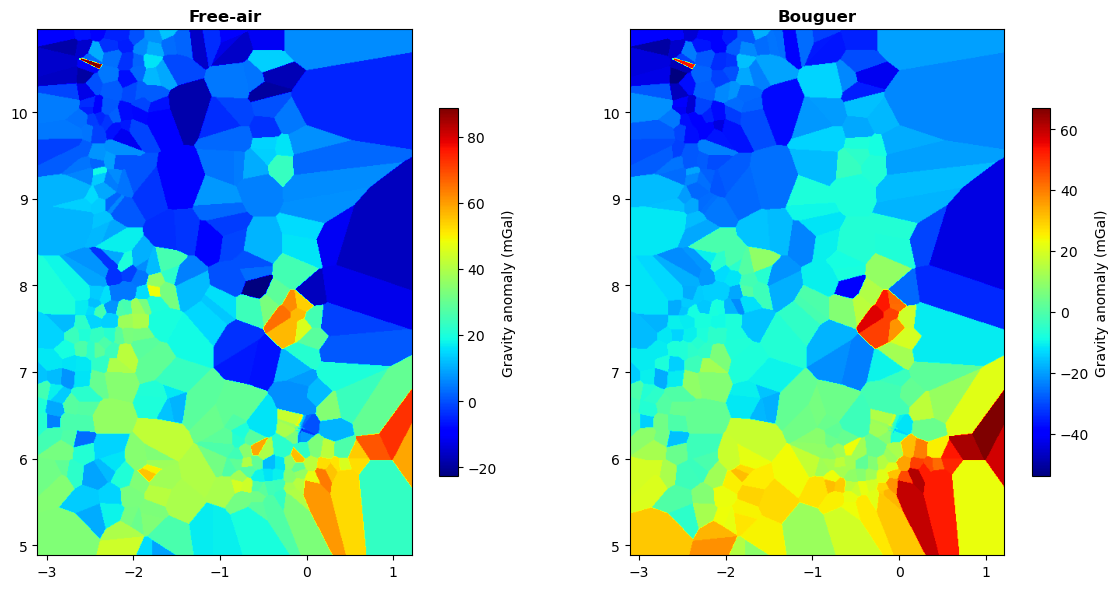

In [16]:
plot_gravity_anomaly(data=df_anomalies, step=1, interp='nearest')